In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('0719.nc')
ds

<xarray.Dataset> Size: 513MB
Dimensions:     (lon: 481, lat: 505, time: 24, ref_time: 8)
Coordinates:
  * lon         (lon) float32 2kB 120.0 120.1 120.1 120.2 ... 149.9 149.9 150.0
  * lat         (lat) float32 2kB 47.6 47.55 47.5 47.45 ... 22.5 22.45 22.4
  * time        (time) datetime64[ns] 192B 2015-07-19 ... 2015-07-19T23:00:00
  * ref_time    (ref_time) datetime64[ns] 64B 2015-07-19 ... 2015-07-19T21:00:00
Data variables:
    psea        (time, lat, lon) float64 47MB ...
    sp          (time, lat, lon) float64 47MB ...
    u           (time, lat, lon) float64 47MB ...
    v           (time, lat, lon) float64 47MB ...
    temp        (time, lat, lon) float64 47MB ...
    rh          (time, lat, lon) float64 47MB ...
    r1h         (time, lat, lon) float64 47MB ...
    ncld_upper  (time, lat, lon) float64 47MB ...
    ncld_mid    (time, lat, lon) float64 47MB ...
    ncld_low    (time, lat, lon) float64 47MB ...
    ncld        (time, lat, lon) float64 47MB ...
Attributes:
    Conventions:  CF-1.0
    history:      created by create_1daync_msm_s_X.rb  2016-03-19

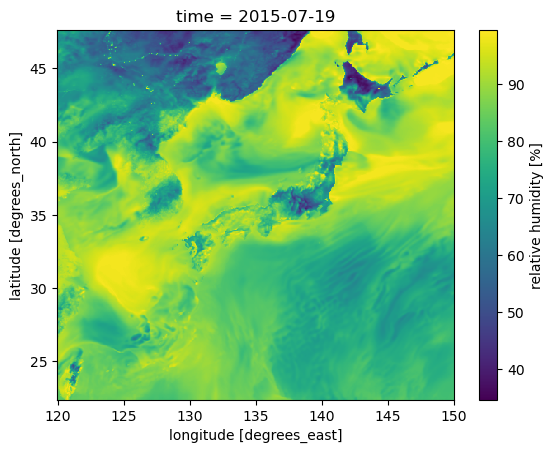

In [3]:
data = ds['rh'][0]
data.plot()

# PLOT USING MATPLOTLIB.PYPLOT

In [6]:
lon1d = data.lon
lat1d = data.lat
lon_grid, lat_grid = np.meshgrid(lon1d, lat1d)

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Define the map projection as Mercator, with a central longitude of 180 degrees
projection = ccrs.Mercator(central_longitude=180)

ax = plt.axes(projection=projection)
levels = np.arange(0, 101, 2)  # Pressure levels in hPa
contourf = ax.contourf(lon_grid, lat_grid, 
                       data, 
                       levels=levels, 
                       cmap="coolwarm", 
                       transform=ccrs.PlateCarree())

#========
# Add contour lines
#contour = ax.contour(lon_grid, lat_grid, data, levels=levels, colors="black", linewidths=0.5, transform=ccrs.PlateCarree())
# Label contour lines
#ax.clabel(contour, contour.levels, inline=True, fontsize=8, fmt='%1.0f hPa')
# Add a color bar for the filled contour
#cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
#cbar.set_label("Surface Air Pressure (hPa)")
#=======

#=====
# Add coastlines and other geographic features for reference
ax.coastlines(resolution='10m', lw=.1)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='none')

# Add gridlines and only show longitude labels
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.top_labels = True  # Turn off top labels
gl.bottom_labels = True  # Show bottom labels (longitude)
gl.left_labels = True  # Turn off left labels (latitude)
gl.right_labels = False # Turn off right labels
gl.xlabel_style = {'size': 10, 'color': 'black'}

# Set extent to cover Japan [longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())

# Add title for the plot
plt.title("Air Pressure Distribution over Japan with Filled Contours and Contour Lines")

#=====
# Coordinates for Tokyo
#tokyo_lon, tokyo_lat = 139.6917, 35.6895
# Mark Tokyo with a red dot and label
#ax.plot(tokyo_lon, tokyo_lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
#ax.text(tokyo_lon + 0.5, tokyo_lat, 'Tokyo', transform=ccrs.PlateCarree(), fontsize=12, color='red')
#====

plt.savefig('humidity.png', dpi=100)
